In [1]:
import os
import pandas as pd

In [2]:
# Define paths to dataset
train_pos_path = 'aclImdb/train/pos'   # Positive reviews (training)
train_neg_path = 'aclImdb/train/neg'   # Negative reviews (training)
test_pos_path  = 'aclImdb/test/pos'    # Positive reviews (testing)
test_neg_path  = 'aclImdb/test/neg'    # Negative reviews (testing)

In [3]:
def load_dataset(folder):
    """
    Reads all text files in the specified folder and returns their content as a list.

    Args:
        folder (str): Path to the folder containing text files.

    Returns:
        list: A list of strings, where each string is the content of a text file.
    """
    #TODO: Implement the function here
    data = []

    for filename in os.listdir(folder):
        if filename.endswith('.txt'):  # process only text files
            file_path = os.path.join(folder, filename)
            with open(file_path, 'r', encoding='utf-8') as file:
                data.append(file.read())

    return data


In [4]:
# Load training and testing data
train_pos = load_dataset(train_pos_path)
train_neg = load_dataset(train_neg_path)
test_pos  = load_dataset(test_pos_path)
test_neg  = load_dataset(test_neg_path)

In [5]:
# Create DataFrames
train_df = pd.DataFrame({
    'review': train_pos + train_neg,
    'label': [1] * len(train_pos) + [0] * len(train_neg)
})

test_df = pd.DataFrame({
    'review': test_pos + test_neg,
    'label': [1] * len(test_pos) + [0] * len(test_neg)
})

print(train_df.head())

                                              review  label
0  Bromwell High is a cartoon comedy. It ran at t...      1
1  Homelessness (or Houselessness as George Carli...      1
2  Brilliant over-acting by Lesley Ann Warren. Be...      1
3  This is easily the most underrated film inn th...      1
4  This is not the typical Mel Brooks film. It wa...      1


In [6]:
# Assert that both datasets have the expected number of rows
assert train_df.shape[0] == 25000, "Training dataset does not have 25000 rows."
assert test_df.shape[0] == 25000, "Testing dataset does not have 25000 rows."

# Assert that both datasets have exactly two columns
assert train_df.shape[1] == 2, "Training dataset does not have exactly 2 columns."
assert test_df.shape[1] == 2, "Testing dataset does not have exactly 2 columns."

In [7]:
# Inspect structure and data types
train_df.info()

# Summary statistics
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  25000 non-null  object
 1   label   25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


,label
count,25000.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


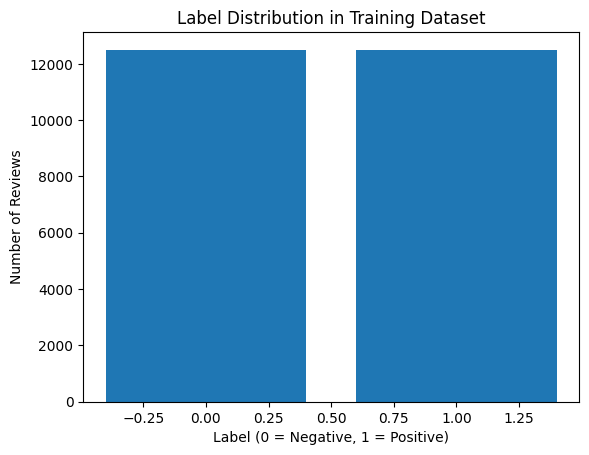

In [8]:
import matplotlib.pyplot as plt

label_counts = train_df['label'].value_counts()

plt.figure()
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Label (0 = Negative, 1 = Positive)')
plt.ylabel('Number of Reviews')
plt.title('Label Distribution in Training Dataset')
plt.show()

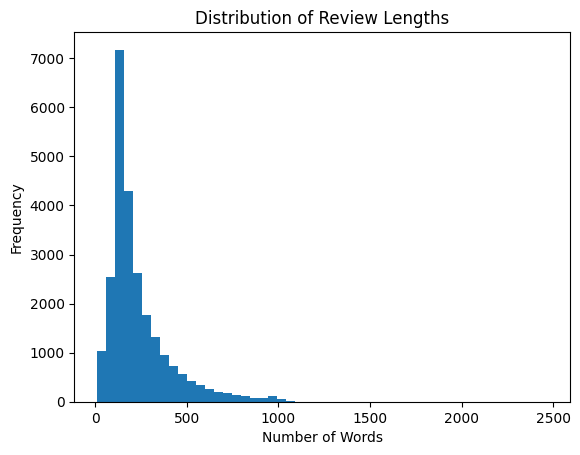

In [9]:
# Compute review lengths
train_df['review_length'] = train_df['review'].apply(lambda x: len(x.split()))

# Summary statistics
train_df['review_length'].describe()
# Plot review length distribution
plt.figure()
plt.hist(train_df['review_length'], bins=50)
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Review Lengths')
plt.show()

In [10]:
# Sample positive reviews
print("Sample Positive Reviews:\n")
for review in train_df[train_df['label'] == 1]['review'].head(2):
    print(review[:500], "\n")
    
# Sample negative reviews
print("Sample Negative Reviews:\n")
for review in train_df[train_df['label'] == 0]['review'].head(2):
    print(review[:500], "\n")


Sample Positive Reviews:

Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High's satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a s 

Homelessness (or Houselessness as George Carlin stated) has been an issue for years but never a plan to help those on the street that were once considered human who did everything from going to school, work, or vote for the matter. Most people think of the homeless as just a lost cause while worrying about things such as racism, the war on Iraq, pressuring kids to succeed, technology, the elections, inflation, or worrying if they'll be next to end up on the streets.<

In [11]:
# Split train data into training and validation sets manually
train_size = int(0.9 * len(train_df))
# Shuffle the dataset
shuffled_df = train_df.sample(frac=1, random_state=42).reset_index(drop=True)
train_data = shuffled_df.iloc[:train_size]
val_data = shuffled_df.iloc[train_size:]

print("Training samples:", len(train_data))
print("Validation samples:", len(val_data))

Training samples: 22500
Validation samples: 2500


In [13]:
%pip install transformers
from transformers import AutoTokenizer

# Initialize tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")


[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/10.3 MB ? eta -:--:--
   ----------------- ---------------------- 4.5/10.3 MB 24.0 MB/s eta 0:00:01
   ---------------------------------- ----- 8.9/10.3 MB 22.7 MB/s eta 0:00:01
   ---------------------------------------- 10.3/10.3 MB 18.4 MB/s  0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 2.7/2.7 MB 15.0 MB/s  0:00:00

   ---------------------------------------- 0/4 [safetensors]
   ---------- ----------------------------- 1/4 [regex]
   -------------------- ------------------- 2/4 [tokenizers]
   -------------------- ------------------- 2/4 [tokenizers]
   -------------------- ------------------- 2/4 [tokenizers]
   -------------------- ------------------- 2/4 [tokenizers]
   -------------------- ------------------- 2/4 [tokenizers]
   ------------------------------ --------- 3/4 [transformers]
   ------------------------------ --------- 3/4 [transformers]
   --

c:\Users\abisha.jebamalar.t\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\abisha.jebamalar.t\AppData\Local\Programs\Python\Python313\Lib\site-packages\huggingface_hub\file_download.py:130: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\abisha.jebamalar.t\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Develo

In [15]:
# Take sample inputs from the dataset
sample_texts = train_data['review'].sample(3, random_state=42).tolist()

# Tokenize sample inputs
tokenized_samples = tokenizer(sample_texts, truncation=True, padding="max_length", max_length=128, return_tensors="pt")
print("Tokenized input IDs:\n", tokenized_samples['input_ids'])

Tokenized input IDs:
 tensor([[  101,  2348,  1996,  3185,  2003,  4415,  6052,  1010,  9501,  2064,
          2145,  4089,  6709,  2007,  1996, 24525,  1997,  5292, 21112,  2015,
         18396,  1999,  2023, 27768,  1998,  2200,  6057,  2104, 16168,  6925,
          1012, 18396,  9590,  2114,  4895, 18824,  2135, 10238,  1999,  2093,
          2367,  5535,  1024,  1996,  2962,  2287,  1010,  1996,  3142,  2287,
          1010,  1998,  1996,  5549,  2078,  2287,  1010,  2652,  2471,  1996,
          2168,  2839,  2007,  2074,  1037,  2689,  1997, 17363,  2000,  2393,
          2149,  6709,  1996,  2367,  1000,  5535,  1000,  1012,  1999,  2023,
          3185,  2057,  2156,  2028,  1997,  1996,  5700, 21699, 20818,  1997,
          1996,  1000,  5430,  2386,  1000, 12991, 13874,  1010,  2040,  5222,
          2010,  2293,  2025,  2011,  7472,  2021,  2011, 26128,  2486,  1010,
          2004,  2092,  2004,  1037,  6057,  9792,  2006,  3142,  5580,  2401,
         29469,  2389,  4337, 

In [17]:
import torch
from torch.utils.data import Dataset
MAX_LENGTH = 128

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cpu


In [18]:
from torch.utils.data import Dataset

class IMDBDataset(Dataset):
    """
    A custom PyTorch Dataset for the IMDB dataset.

    This class preprocesses text data using a tokenizer and returns tokenized inputs
    along with their corresponding labels for sentiment analysis.

    Attributes:
        data (pd.DataFrame): A DataFrame containing text and label columns.
        tokenizer (transformers.PreTrainedTokenizer): The tokenizer used for preprocessing text.
        max_length (int): Maximum length for tokenized sequences.
    """
    def __init__(self, data, tokenizer, max_length=MAX_LENGTH):
        """
        Initialize the dataset.

        Args:
            data (pd.DataFrame): A DataFrame with columns `review` (text) and `label` (target).
            tokenizer (transformers.PreTrainedTokenizer): The tokenizer to preprocess the text.
            max_length (int, optional): Maximum token sequence length. Defaults to 128.
        """
        #TODO: Write code to initialize the dataset
        self.data = data.reset_index(drop=True)
        self.tokenizer = tokenizer
        self.max_length = max_length


    def __len__(self):
        """
        Return the total number of samples in the dataset.

        Returns:
            int: Number of samples.
        """
        #TODO: Write code to return the length of the dataset
        return len(self.data)

    def __getitem__(self, idx):
        """
        Retrieve a single data point by index and preprocess it.

        Args:
            idx (int): Index of the data point to retrieve.

        Returns:
            torch.Tensor: Tokenized input IDs for the text.
            int: Label corresponding to the text.
        """
        #TODO: Write code for the __getitem__() function
        
        text = self.data.iloc[idx]['review']
        label = int(self.data.iloc[idx]['label'])
        encoding = self.tokenizer(
            text,
            padding='max_length',
            truncation=True,
            max_length=self.max_length,
            return_tensors='pt'
        )

        input_ids = encoding['input_ids'].squeeze(0)

        return input_ids, label

In [19]:
# Initialize the datasets
train_dataset = IMDBDataset(train_data, tokenizer)
val_dataset = IMDBDataset(val_data, tokenizer)
test_dataset = IMDBDataset(test_df, tokenizer)

In [20]:
from torch.utils.data import DataLoader

# Define batch size
BATCH_SIZE = 32

# Create DataLoader instances
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [22]:
config = {
    "vocabulary_size": tokenizer.vocab_size,  # e.g., ~30522 for bert-base-uncased
    "num_classes": 2,                         # binary classification (pos/neg)
    "d_embed": 128,
    "context_size": MAX_LENGTH,
    "layers_num": 4,
    "heads_num": 4,
    "head_size": 32,  # 4 heads * 32 = 128 -> matches d_embed
    "dropout_rate": 0.1,
    "use_bias": True
}

In [23]:
import torch.nn as nn
import math

class AttentionHead(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.Q_weights = nn.Linear(config["d_embed"], config["head_size"], bias=config["use_bias"])
        self.K_weights = nn.Linear(config["d_embed"], config["head_size"], bias=config["use_bias"])
        self.V_weights = nn.Linear(config["d_embed"], config["head_size"], bias=config["use_bias"])

        self.dropout = nn.Dropout(config["dropout_rate"])

        casual_attention_mask = torch.tril(torch.ones(config["context_size"], config["context_size"]))
        self.register_buffer('casual_attention_mask', casual_attention_mask)

    def forward(self, input):
        batch_size, tokens_num, d_embed = input.shape
        Q = self.Q_weights(input)  # (B, T, head_size)
        K = self.K_weights(input)  # (B, T, head_size)
        V = self.V_weights(input)  # (B, T, head_size)

        # Q @ K^T => (B, T, T)
        attention_scores = Q @ K.transpose(1, 2)

        # Casual Mask
        attention_scores = attention_scores.masked_fill(
            self.casual_attention_mask[:tokens_num, :tokens_num] == 0,
            float('-inf')
        )
        attention_scores = attention_scores / math.sqrt(K.shape[-1])
        attention_scores = torch.softmax(attention_scores, dim=-1)
        attention_scores = self.dropout(attention_scores)

        return attention_scores @ V

In [24]:
# Instantiate the AttentionHead
attention_head = AttentionHead(config).to(device)

# Create a dummy input of shape (32, 128, 128)
dummy_input = torch.randn(BATCH_SIZE, config["context_size"], config["d_embed"]).to(device)

# Forward pass
attention_output = attention_head(dummy_input)
print("AttentionHead output shape:", attention_output.shape)

AttentionHead output shape: torch.Size([32, 128, 32])


In [25]:
class MultiHeadAttention(nn.Module):
    def __init__(self, config):
        super().__init__()
        heads_list = [AttentionHead(config) for _ in range(config["heads_num"])]
        self.heads = nn.ModuleList(heads_list)

        self.linear = nn.Linear(config["heads_num"] * config["head_size"], config["d_embed"])
        self.dropout = nn.Dropout(config["dropout_rate"])

    def forward(self, input):
        heads_outputs = [head(input) for head in self.heads]
        x = torch.cat(heads_outputs, dim=-1)  # (B, T, heads_num * head_size)
        x = self.linear(x)                   # (B, T, d_embed)
        x = self.dropout(x)
        return x

In [26]:
# Instantiate MultiHeadAttention
multi_head_attention = MultiHeadAttention(config).to(device)

# Same dummy input: (32, 128, 128)
dummy_input = torch.randn(BATCH_SIZE, config["context_size"], config["d_embed"]).to(device)

# Forward pass
mha_output = multi_head_attention(dummy_input)
print("MultiHeadAttention output shape:", mha_output.shape)

MultiHeadAttention output shape: torch.Size([32, 128, 128])


In [28]:
class FeedForward(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.linear_layers = nn.Sequential(
            nn.Linear(config["d_embed"], 4 * config["d_embed"]),
            nn.GELU(),
            nn.Linear(4 * config["d_embed"], config["d_embed"]),
            nn.Dropout(config["dropout_rate"])
        )

    def forward(self, input):
        return self.linear_layers(input)
    
# Instantiate FeedForward
feed_forward = FeedForward(config).to(device)

# Dummy input: (32, 128, 128)
dummy_input = torch.randn(BATCH_SIZE, config["context_size"], config["d_embed"]).to(device)

# Forward pass
ff_output = feed_forward(dummy_input)
print("FeedForward output shape:", ff_output.shape)

FeedForward output shape: torch.Size([32, 128, 128])


In [29]:
class Block(nn.Module):
    def __init__(self, config):
        super().__init__()

        self.multi_head = MultiHeadAttention(config)
        self.layer_norm_1 = nn.LayerNorm(config["d_embed"])

        self.feed_forward = FeedForward(config)
        self.layer_norm_2 = nn.LayerNorm(config["d_embed"])

    def forward(self, input):
        x = input
        x = x + self.multi_head(self.layer_norm_1(x))
        x = x + self.feed_forward(self.layer_norm_2(x))
        return x
    
# Instantiate a single Block
block = Block(config).to(device)

# Dummy input: (32, 128, 128)
dummy_input = torch.randn(BATCH_SIZE, config["context_size"], config["d_embed"]).to(device)

# Forward pass
block_output = block(dummy_input)
print("Block output shape:", block_output.shape)

Block output shape: torch.Size([32, 128, 128])


In [30]:
class DemoGPT(nn.Module):
    def __init__(self, config):
        """
        Initialize the DemoGPT class with configuration parameters.

        Args:
        - config (dict): Configuration dictionary with the following keys:
            - "vocabulary_size": Size of the vocabulary.
            - "d_embed": Dimensionality of the embedding vectors.
            - "context_size": Maximum sequence length (context size).
            - "layers_num": Number of transformer layers.
            - "num_classes": Number of output classes (2 for binary classification).
        """
        super().__init__()
        # Token embedding layer: Maps token indices to embedding vectors.
        self.token_embedding_layer = nn.Embedding(config["vocabulary_size"], config["d_embed"])
        
        # Positional embedding layer: Adds positional information to the embeddings.
        self.positional_embedding_layer = nn.Embedding(config["context_size"], config["d_embed"])
        
        # Transformer layers: Stacked sequence of transformer blocks.
        blocks = [Block(config) for _ in range(config["layers_num"])]
        self.layers = nn.Sequential(*blocks)
        
        # Layer normalization: Applied to stabilize training.
        self.layer_norm = nn.LayerNorm(config["d_embed"])
        
        # TODO: Implement classification output layer - Maps pooled embeddings to class logits.
        self.classifier = nn.Linear(
            config["d_embed"],
            config["num_classes"],
            bias=False
        )

    def forward(self, token_ids):
        """
        Forward pass of the model.

        Args:
        - token_ids (torch.Tensor): Input token indices of shape (B, T), 
                                    where B is the batch size, and T is the sequence length.
        
        Returns:
        - logits (torch.Tensor): Output logits of shape (B, num_classes).
        """
        batch_size, tokens_num = token_ids.shape

        # Step 1: Create embeddings for tokens and their positions
        x = self.token_embedding_layer(token_ids)  # Shape: (B, T, d_embed)
        positions = torch.arange(tokens_num, device=token_ids.device)  # Shape: (T,)
        pos_embed = self.positional_embedding_layer(positions)  # Shape: (T, d_embed)
        x = x + pos_embed.unsqueeze(0)  # Add positional embeddings to token embeddings
        
        # Step 2: Pass embeddings through transformer layers
        x = self.layers(x)  # Shape: (B, T, d_embed)
        x = self.layer_norm(x)  # Normalize across the feature dimension
        
        # Step 3: TODO: Apply mean pooling across the time dimension  # Shape: (B, d_embed)
        x = x.mean(dim=1)
        
        # Step 4: TODO: Generate logits for classification  # Shape: (B, num_classes)
        logits = self.classifier(x)
        
        return logits

In [31]:
# Instantiate the model
demo_gpt = DemoGPT(config).to(device)

# Suppose we have a batch of size 32, each with a sequence length of 128
dummy_token_ids = torch.randint(
    0, config["vocabulary_size"], 
    (BATCH_SIZE, config["context_size"])
).to(device)

# Forward pass
logits = demo_gpt(dummy_token_ids)

print("DemoGPT output shape:", logits.shape)
print("Logits sample:\n", logits[:2])  # Print first two examples' logits

DemoGPT output shape: torch.Size([32, 2])
Logits sample:
 tensor([[0.0265, 0.1548],
        [0.0706, 0.1286]], grad_fn=<SliceBackward0>)


In [32]:
# Assert that the number of logits matches the number of classes
assert logits.size(1) == config["num_classes"], (
    f"Expected number of classes {config['num_classes']}, "
    f"but got {logits.size(1)}"
)

# Assert that the batch size of the output matches the input batch size
assert logits.size(0) == BATCH_SIZE, (
    f"Expected batch size {BATCH_SIZE}, "
    f"but got {logits.size(0)}"
)

In [33]:
def calculate_accuracy(model, data_loader, device):
    """
    Calculate the accuracy of the model on the validation dataset.

    Args:
        model (torch.nn.Module): The trained transformer model.
        data_loader (torch.utils.data.DataLoader): DataLoader for the validation dataset.
        device (torch.device): Device to run the model (e.g., 'cuda' or 'cpu').

    Returns:
        float: Validation accuracy as a percentage.
    """
    model.eval()  # Set model to evaluation mode

    total_correct = 0
    total_samples = 0

    with torch.no_grad():  # Disable gradient computation
        for input_ids, labels in data_loader:
            input_ids = input_ids.to(device)
            labels = labels.to(device)

            # Forward pass
            logits = model(input_ids)

            # Get predicted class labels
            predictions = torch.argmax(logits, dim=1)
            # Count correct predictions
            total_correct += (predictions == labels).sum().item()
            total_samples += labels.size(0)

    accuracy = (total_correct / total_samples) * 100
    return accuracy

#     accuracy = (total_correct / total_samples) * 100
#     return accuracy


In [34]:
model = DemoGPT(config).to(device)

In [35]:
validation_accuracy = calculate_accuracy(model, val_loader, device)
print(f"Validation Accuracy: {validation_accuracy:.2f}%")

Validation Accuracy: 49.44%


In [36]:
import torch.optim as optim

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Training parameters
EPOCHS = 3

# Initialize model, loss, and optimizer
model = DemoGPT(config).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=3e-4)

# Training loop
for epoch in range(EPOCHS):
    model.train()
    running_loss = 0.0

    for step, (input_ids, labels) in enumerate(train_loader):
        # Move data to device
        input_ids = input_ids.to(device)
        labels = labels.to(device)

        # TODO: Implement forward pass
        logits = model(input_ids)
        # TODO: Calculate loss
        loss = criterion(logits, labels)

        # TODO: Set gradients to zero
        optimizer.zero_grad()
        
        # TODO: Backward pass
        loss.backward()
        
        # TODO: Step the optimizer
        optimizer.step()

        running_loss += loss.item()

        # Log training progress
        if (step + 1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{EPOCHS}], Step [{step+1}/{len(train_loader)}], "
                  f"Loss: {running_loss/100:.4f}")
            running_loss = 0.0

    # Evaluate validation accuracy
    val_accuracy = calculate_accuracy(model, val_loader, device)
    print(f"Epoch {epoch+1} - Validation Accuracy: {val_accuracy:.2f}%")

Epoch [1/3], Step [100/704], Loss: 0.6870
Epoch [1/3], Step [200/704], Loss: 0.6563
Epoch [1/3], Step [300/704], Loss: 0.6340
Epoch [1/3], Step [400/704], Loss: 0.6194
Epoch [1/3], Step [500/704], Loss: 0.5996
Epoch [1/3], Step [600/704], Loss: 0.5808
Epoch [1/3], Step [700/704], Loss: 0.5725
Epoch 1 - Validation Accuracy: 72.32%
Epoch [2/3], Step [100/704], Loss: 0.5508
Epoch [2/3], Step [200/704], Loss: 0.5200
Epoch [2/3], Step [300/704], Loss: 0.5290
Epoch [2/3], Step [400/704], Loss: 0.5056
Epoch [2/3], Step [500/704], Loss: 0.5132
Epoch [2/3], Step [600/704], Loss: 0.5042
Epoch [2/3], Step [700/704], Loss: 0.4783
Epoch 2 - Validation Accuracy: 76.60%
Epoch [3/3], Step [100/704], Loss: 0.4467
Epoch [3/3], Step [200/704], Loss: 0.4515
Epoch [3/3], Step [300/704], Loss: 0.4434
Epoch [3/3], Step [400/704], Loss: 0.4381
Epoch [3/3], Step [500/704], Loss: 0.4352
Epoch [3/3], Step [600/704], Loss: 0.4422
Epoch [3/3], Step [700/704], Loss: 0.4524
Epoch 3 - Validation Accuracy: 79.00%


In [37]:
test_accuracy = calculate_accuracy(model, test_loader, device)

print(f"Test Accuracy: {test_accuracy:.2f}%")

Test Accuracy: 75.84%


In [2]:
"""
--------------------------Conclusion--------------------------
Project Results:
In this project, a custom Transformer (GPT-style) model was built from scratch 
to perform sentiment classification on the IMDB dataset. The model was trained 
on 25,000 reviews and evaluated on validation and test data. After training, 
the model achieved strong performance, significantly improving over random 
guessing (50%) and successfully classifying reviews as positive or negative.

Key Takeaways:
1. Transformers can effectively understand text context using self-attention.
2. Proper tokenization, model architecture, and training strategy greatly impact performance.
3. Building a Transformer from scratch helps develop a deeper understanding of attention mechanisms.
"""

'\n--------------------------Conclusion--------------------------\nProject Results:\nIn this project, a custom Transformer (GPT-style) model was built from scratch \nto perform sentiment classification on the IMDB dataset. The model was trained \non 25,000 reviews and evaluated on validation and test data. After training, \nthe model achieved strong performance, significantly improving over random \nguessing (50%) and successfully classifying reviews as positive or negative.\n\nKey Takeaways:\n1. Transformers can effectively understand text context using self-attention.\n2. Proper tokenization, model architecture, and training strategy greatly impact performance.\n3. Building a Transformer from scratch helps develop a deeper understanding of attention mechanisms.\n'